# Homework 3

- Code must be commented. If you use code you found online, you have to add the link to the source you used. There is no penalty for using outside sources as long as you convince us you understand the code.

**To pass the homework you need to attempt to do all tasks. If we see that you misunderstand some concept, you may receive personal feedback and you can have a chance to resubmit your homework.**
**Please treat these homeworks as learning opportunities to support your study! Instead of copy-pasting solution, attempt to do it yourself and rather learn from feedback**

\*Once completed zip the entire directory containing this exercise and upload it to Moodle.

**For background reading see http://cs231n.github.io/linear-classify/ and http://cs231n.github.io/optimization-1/.**


### Theory

We have a linear classifier (you could also call it 1-layer neural network). Input to the network is a vector $\mathbf{x}$ of $D$ features, output of the network is vector of $C$ class probablities $\mathbf{p}$. The target class $c$ is coded as one-hot vector $\mathbf{y}$ (meaning it has 1 at index $c$ and zeroes everywhere else). Weights of the network are represented by $N \times C$ matrix $\mathbf{W}$.

$$
\mathbf{x} = \begin{pmatrix} x_1 & x_2 & ..& x_D \end{pmatrix}
\qquad
\mathbf{p} = \begin{pmatrix} p_1 & p_2 & .. & p_C \end{pmatrix}
\qquad
\mathbf{y} = \begin{pmatrix} y_1 & y_2 & .. & y_C \end{pmatrix}
\qquad y_i =
\begin{cases}
    1, &\textrm{if}\ \ i=c\\
    0, &otherwise
\end{cases}
\qquad
\mathbf{W} = \begin{pmatrix} w_{11}&w_{12}&..&w_{1C}\\w_{21}&w_{22}&..&w_{2C}\\..&..&..&..\\w_{D1}&w_{D2}&..&w_{DC} \end{pmatrix}
$$

Notice we are missing **biases**, but without a loss of generalization we can add another feature to the inputs which is always $1$ and this turns weights of this feature into biases.

To train the network we use cross-entropy loss function and perform gradient descent with respect to weight matrix $\mathbf{W}$. Following represents step-by-step forward pass of the network, where $L$ is the loss function:

\begin{align*}
z*j = \sum*{i=1}^D x*i W*{ij},\qquad\qquad \textrm{which can be achieved via} \qquad\qquad \mathbf{z} &= \mathbf{x}W,
\\
\qquad p*i = \frac{e^{z_i}}{\sum*{j=1}^C e^{z_j}},\qquad\qquad\qquad \textrm{ or in short} \qquad\qquad\qquad\qquad \mathbf{p} &= softmax(\mathbf{z}),
\end{align*}

\begin{align*}
L &= -\sum\_{i=1}^C y_i \log p_i = -\log p_c \qquad\qquad\qquad \textrm{ (only c-th element matters)}
\end{align*}

Graphically this problem looks like:

<img src="network.png" width="750">


$$
\begin{align*}
\frac{\delta L}{\delta p_l} &= -\frac{\delta}{\delta p_l}\sum_{i=1}^C y_{i} \log p_i  = -\frac{y_l}{p_l}
\\
\frac{\delta p_l}{\delta z_k} &= \frac{\delta \frac{e^{z_l}}{\sum_{j=1}^m e^{z_j} } }{\delta z_k} =
\begin{cases}
   \frac{e^{z_l} \sum_{j=1}^m e^{z_j}-e^{z_l} e^{z_l}}{\left(\sum_{j=1}^m\ e^{z_j}\right)^2} = \frac{e^{z_l}}{\sum_{j=1}^m\ e^{z_j}} \left(\frac{\sum_{j=1}^m e^{z_j}}{\sum_{j=1}^m\ e^{z_j}} - \frac{e^{z_l}}{\sum_{j=1}^m\ e^{z_j}} \right) = p_l(1-p_l), & l=k\\
   \frac{-\ e^{z_l} e^{z_k}}{\left(\sum_{j=1}^m\ e^{z_j}\right)^2} = -p_l p_k, & l\neq k
\end{cases}
\\
\frac{\delta z_k}{\delta W_{ij}} &= \frac{\delta \sum_{i=1}^D x_{i}W_{ik}}{\delta W_{ij}}=  x_i\\
or
\\
\frac{\delta z_k}{\delta W_{ij}} &= \frac{\delta \sum_{i=1}^D \sum_{j=1}^C x_{i}W_{ij}}{\delta W_{ij}}=
\begin{cases}
  x_i, & j=k\\
   0, & j\neq k
\end{cases}
\end{align*}
$$


&nbsp;

&nbsp;

For you to be able to complete the coding tasks, we give you the correct final formulas, obtained when putting the above three partial derivatives together:

$$
\begin{align*}
\frac{\partial L}{\partial z_k} &= \sum_{l=1}^C \frac{\partial L}{\partial p_l} \frac{\partial p_l}{\partial z_k}= -\frac{y_k}{p_k} p_k (1-p_k) + \sum_{l\neq k}^C \frac{y_l}{p_l} p_l p_k = -y_k + y_k p_k + \sum_{l\neq k}^C y_l p_k  = -y_k + p_k \sum_{l=1}^C y_l= p_k-y_k
\\
\frac{\partial L}{\partial W_{ij}} &= \sum_{k=1}^C \frac{\partial L}{\partial z_k} \frac{\partial z_k}{\partial W_{ij}} = (p_j - y_j) x_i
\end{align*}
$$

This computes the gradient value in one data point. However, for increased stability, it is beneficial to learn from average gradient over multiple points. The collection of N samples is called a **minibatch**. We note the loss in k-th data point by $L_k$ and the average loss with $\textbf{L}$.

\begin{align*}
\textbf{L}=\frac{1}{N}\sum\_{k=1}^N L_k
\end{align*}

\begin{align*}
\frac{\partial \textbf{L}}{\partial W*{ij}} &= \frac{1}{N} \sum*{l=1}^N \frac{\partial L*k}{\partial W*{ij}}
\end{align*}

It is convenient to work with average loss and average gradients, not the sum, because then the magnitude of the value does not depend on batch-size N.

---

To perform a gradient descent you need to subtract gradient from the weights (because we are minimizing the loss function):

$$
W_{ij}^{t+1} = W_{ij}^t - \alpha \frac{\partial \textbf{L}}{\partial W_{ij}}
$$

Here $\alpha$ is a learning rate that must be tuned manually.

Using the learning rule and the formulas for calculating gradients for each element of W, you should be able to complete the first coding task below (marked with task 2.2).


In [ ]:
!pip3 install torch torchvision

In [1]:
import torch

In [3]:
from data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## CIFAR-10 Data Loading and Preprocessing


In [4]:
"""

    Load CIFAR (check that the path to dataset directory matches its location in your computer.)

"""

cifar10_dir = '../datasets/cifar-10-batches-py/'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# move top torch
X_train = torch.from_numpy( X_train ).float()
y_train = torch.from_numpy( y_train ).float()
X_test = torch.from_numpy( X_test ).float()
y_test = torch.from_numpy( y_test ).float()

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  torch.Size([50000, 32, 32, 3])
Training labels shape:  torch.Size([50000])
Test data shape:  torch.Size([10000, 32, 32, 3])
Test labels shape:  torch.Size([10000])


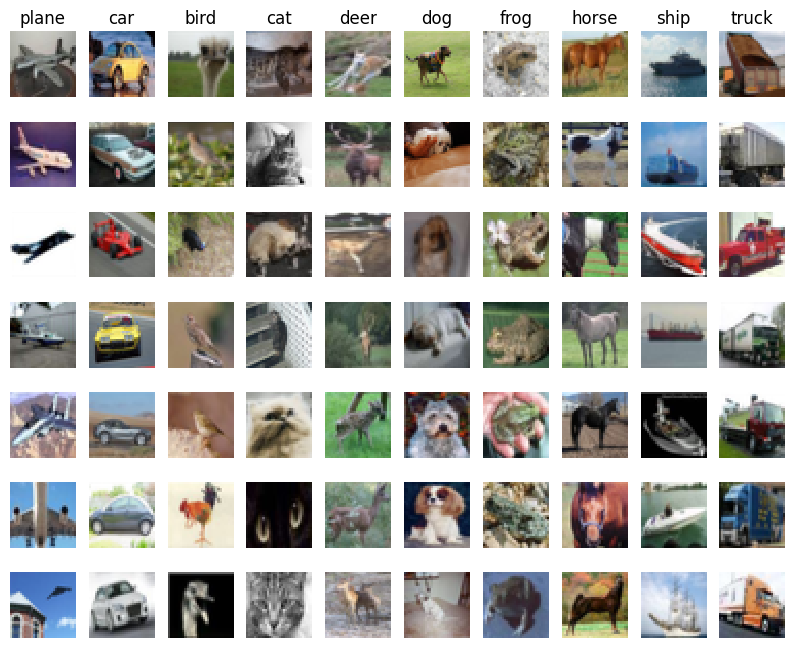

In [6]:
"""

    Visualize some examples from the dataset.
    We show a few examples of training images from each class.

"""

classes = [
    'plane',
    'car',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]

num_classes = len(classes)
samples_per_class = 7

for y, cls in enumerate(classes):

    idxs = torch.where(y_train == y)[0]

    perm = torch.randperm(len(idxs))[:samples_per_class] # permutation
    selected_idxs = idxs[perm]

    for i, idx in enumerate(selected_idxs):

        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)

        img = X_train[idx]

        plt.imshow(img.to(torch.uint8).cpu().numpy()) # tensor to cpu
        plt.axis('off')
        if i == 0:
            plt.title(cls)

plt.show()

In [7]:
"""

    Split the data into train, val, and test sets. In addition we will
    create a small development set as a subset of the training data;
    we can use this for development so our code runs faster.

"""

num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

# Our validation set will be num_validation points from the original
# training set.
X_val = X_train[ num_training : num_training + num_validation ]
y_val = y_train[ num_training : num_training + num_validation ]

# Our training set will be the first num_train points from the original
# training set.
#X_train_original = X_train # Keep a reference if needed
X_train = X_train[ : num_training ]
y_train = y_train[ : num_training ]

# We will also make a development set, which is a small subset of
# the training set.
mask = torch.randperm(num_training)[ : num_dev ] # permutation
X_dev = X_train[mask]
y_dev = y_train[mask]

# We use the first num_test points of the original test set as our
# test set.
X_test = X_test[:num_test]
y_test = y_test[:num_test]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  torch.Size([49000, 32, 32, 3])
Train labels shape:  torch.Size([49000])
Validation data shape:  torch.Size([1000, 32, 32, 3])
Validation labels shape:  torch.Size([1000])
Test data shape:  torch.Size([1000, 32, 32, 3])
Test labels shape:  torch.Size([1000])


In [8]:
"""

    Preprocessing: reshape the image data into rows

"""

X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_dev = X_dev.reshape(X_dev.shape[0], -1)

print( f'X train shape: { X_train.shape }' )
print( f'X val shape: { X_val.shape }' )
print( f'X test shape: { X_test.shape }' )
print( f'X dev shape: { X_dev.shape }' )

X train shape: torch.Size([49000, 3072])
X val shape: torch.Size([1000, 3072])
X test shape: torch.Size([1000, 3072])
X dev shape: torch.Size([500, 3072])


tensor([130.6419, 135.9817, 132.4739, 130.0557, 135.3480, 131.7540, 130.9606,
        136.1433, 132.4764, 131.4847])


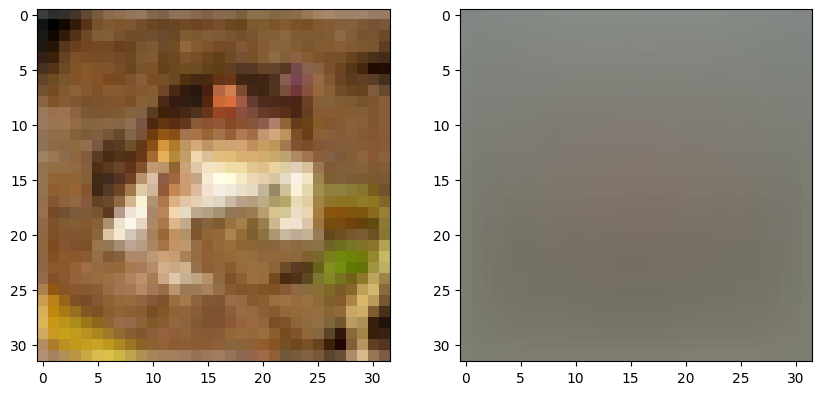

In [9]:
"""

    Preprocessing: subtract the mean image

"""

# first: compute the image mean based on the training data

mean_image = torch.mean(X_train, dim=0)
print(mean_image[:10])

fig, ax = plt.subplots( 1, 2 )

ax[0].imshow( X_train[0].reshape(32, 32, 3).to(torch.uint8).cpu().numpy() )
ax[1].imshow( mean_image.reshape(32, 32, 3).to(torch.uint8).cpu().numpy() )

plt.show()

In [10]:
# second: subtract the mean image from train and test data

X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image

In [11]:
# third: append the bias dimension of ones (i.e. bias trick) so that our model only has to worry about optimizing a single weight matrix W.

X_train = torch.cat([X_train, torch.ones((X_train.shape[0], 1))], dim=1)
X_val = torch.cat([X_val, torch.ones((X_val.shape[0], 1))], dim=1)
X_test = torch.cat([X_test, torch.ones((X_test.shape[0], 1))], dim=1)
X_dev = torch.cat([X_dev, torch.ones((X_dev.shape[0], 1))], dim=1)

print( f'X train shape: { X_train.shape }' )
print( f'X val shape: { X_val.shape }' )
print( f'X test shape: { X_test.shape }' )
print( f'X dev shape: { X_dev.shape }' )

X train shape: torch.Size([49000, 3073])
X val shape: torch.Size([1000, 3073])
X test shape: torch.Size([1000, 3073])
X dev shape: torch.Size([500, 3073])


## Softmax Classifier

Your code for this section will all be written inside `softmax.py`.

**Task 3.1:** First implement the naive softmax loss function with nested loops. Open the file `softmax.py` and implement the `softmax_loss_naive` function.


In [14]:
#############################################################################
#                                                                           #
# TODO: implement code in softmax.py                                        #
#                                                                           #
#############################################################################

from softmax import softmax_loss_naive
import time

# Generate a random softmax weight matrix and use it to compute the loss.
W = torch.randn(3073, 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % ( -torch.log(torch.tensor(0.1)) ))

assert loss != 0.0, "ERROR: Loss is zero - softmax_loss_naive seems to not be implemented"
assert torch.isclose(loss, -torch.log(torch.tensor(0.1, dtype=torch.float64)), atol=0.5), \
    "ERROR: Loss is not close to -log(0.1) = 2.302585, check your softmax implementation"
print("Task 3.1 passed: loss sanity check OK")

loss: 2.394501
sanity check: 2.302585
Task 3.1 passed: loss sanity check OK


**Task 3.2:** Why do we expect our loss to be close to $-\log(0.1)$? Explain briefly.


**Your answer:** Because the weights are random with very small differences between them, the vector $\mathbf{p}$ will be approximately uniform distribution (because the elements of $\mathbf{z}$ will be almost equal). Since we have 10 classes, the probability of each class is approximately $0.1$.


**Task 3.3:** Complete the implementation of `softmax_loss_naive` and implement a (naive) version of the gradient that uses nested loops.


In [16]:
#############################################################################
#                                                                           #
# TODO: implement code in softmax.py                                        #
#                                                                           #
#############################################################################

loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# Use numeric gradient checking as a debugging tool.
# The numeric gradient should be close to the analytic gradient
# (relative error should be in the magnitude of 1e-8).
print("Without regularization:")
from gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

# Do another gradient check with regularization.
print("With regularization:")
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

# Hint: the gardients your code finds and the gradients computed numerically should more-or-less agree
# you can expect on average 10^-8 error. A 10^-6 might also happen. Anything bigger is suspicious.

assert not torch.all(grad == 0), \
    "ERROR: Gradient is all zeros - gradient computation in softmax_loss_naive seems not implemented"
print("Task 3.3 passed: gradient is non-zero")

Without regularization:
numerical: -2.023992 analytic: -2.023991, relative error: 1.871402e-07
numerical: 2.986403 analytic: 2.986403, relative error: 1.112030e-08
numerical: 1.099227 analytic: 1.099227, relative error: 1.642547e-08
numerical: -2.438571 analytic: -2.438571, relative error: 1.485276e-07
numerical: 0.840008 analytic: 0.840008, relative error: 9.860232e-08
numerical: -1.461333 analytic: -1.461333, relative error: 1.904914e-08
numerical: 0.817339 analytic: 0.817339, relative error: 2.271953e-07
numerical: 2.656228 analytic: 2.656228, relative error: 9.448002e-09
numerical: -5.985570 analytic: -5.985570, relative error: 2.493925e-08
numerical: -1.241090 analytic: -1.241090, relative error: 2.828718e-08
With regularization:
numerical: -2.964086 analytic: -2.964086, relative error: 2.588126e-08
numerical: -1.618904 analytic: -1.618904, relative error: 1.954208e-08
numerical: 1.014135 analytic: 1.014135, relative error: 1.832623e-07
numerical: 0.482841 analytic: 0.482841, rela

## Vectorization of the network and learning

By now you have (hopefully) implemented how to do the froward pass and apply the gradient calculation element by element to the parameters in the weight matrix. However, this code performed the gradient comutation for one data point at a time, with a surrounding for-loop collecting values over N data points and later averaging them.

As demonstrated on distance calculations in the previous practice, calculating values using for loops is time-consuming. We now look for a way to get rid of for-loops and compute values in a vecotrized way for all N data points in one go.

We now have as inputs:

**X:** Matrix of shape (N, D) containing a minibatch of data.  
**W:** Matrix of shape (D, C) containing weights.  
The correct labels can be cosidered as one-hot encoded, forming also a matrix:  
**Y:** Matrix of shape (N,C) containing the labels

---

First of all, we look at the **forward pass.**

Above, we showed that given one row vector of inputs (shape (1,D)), the weighted summing corresponds to the matrix multiplication:

$$
\begin{align*}
\mathbf{z} &= \mathbf{x}W \qquad
\end{align*}
$$

This also holds for a matrix of inputs where each line is a data point (N,D):

\begin{align*}
\mathbf{Z} &= \mathbf{X}W,
\end{align*}

which can be shown on whiteboard. The result is a NxC matrix of **Z**, **where again each line of activations ccorresponds to a data point.** The softmax operation is also applied line-by-line, so each line of P corresponds to one input. Finally, the cross-entropy loss calculation is done line-by-line resulting in a loss value per data point - shape (N,1).

So we have  
**Z:** Matrix of shape (N, C) containing activation vectors.  
**P:** Matrix of shape (N, C) containing output probabilities.  
**L:** Vector of shape (N, 1) containing losses.

We wish to average over the losses as in the naive implementation.

---

**Backward pass:** Secondly, we need to calculate the gradients with respect to the weights.

In our above notation, where L was a real number and x was a vector, we had:
\begin{align*}
\frac{\partial L}{\partial W\_{ij}} &= (p_j - y_j) x_i
\end{align*}

In here, X is (N,D) matrix. We showed above that each line of Z, P and Y correspond to one data point and depend on only one line of X. So, we can express average gradient over samples as

$$
\begin{align*}
\frac{\partial \textbf{L}}{\partial W_{ij}} &= \frac{1}{N} \sum_{k=1}^N x_{ki}(p_{kj}-y_{kj})
\end{align*}
$$

This sum can be achieved via the following matrix multiplication:  
\begin{align*}
\frac{1}{N}\textbf{X}^T \ (P \ - \ Y) &=\frac{1}{N} \sum*{k=1}^N x*{ki}(p*{kj}-y*{kj})
\end{align*}

The correspondence can be showed on whiteboard in class, if needed.

The matrix multiplication formulas for finding **Z**, and $\frac{\partial \textbf{L}}{\partial W_{ij}}$, combined with some broadcasting, are sufficient to implement the forward and backward passes without for loops.


**Task 3.4:** Now that we have a naive implementation of the softmax loss function and its gradient, implement a vectorized version in `softmax_loss_vectorized`. The two versions should compute the same results, but the vectorized version should be much faster (around 10x).


In [26]:
#############################################################################
#                                                                           #
# TODO: implement code in softmax.py                                        #
#                                                                           #
#############################################################################

tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))

# We use the Frobenius norm to compare the two versions of the gradient.

grad_difference = torch.norm(grad_naive - grad_vectorized, p='fro').item()

print('Loss difference: %f' % abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

#Hint, these two differences have to be 0.0000, otherwise you must have a bug.

assert abs(loss_naive - loss_vectorized) < 1e-3, \
    "ERROR: Loss difference between naive and vectorized is too large - check vectorized implementation"
assert grad_difference < 1e-3, \
    "ERROR: Gradient difference between naive and vectorized is too large - check vectorized implementation"
print("Task 3.4 passed: vectorized implementation matches naive")

naive loss: 2.394501e+00 computed in 0.126989s
vectorized loss: 2.394501e+00 computed in 0.087522s
Loss difference: 0.000000
Gradient difference: 0.000000
Task 3.4 passed: vectorized implementation matches naive


### Stochastic Gradient Descent

We now have vectorized and efficient expressions for the loss, the gradient and our gradient matches the numerical gradient. We are therefore ready to do SGD to minimize the loss.

**Task 3.5**

In the file `linear_classifier.py`, implement SGD in the function `LinearClassifier.train()` and then run it with the code below.


In [27]:
#############################################################################
#                                                                           #
# TODO: implement code in linear_classifier.py                              #
#                                                                           #
#############################################################################

from linear_classifier import Softmax

# Assuming X_train and y_train are already torch tensors
model = Softmax()
tic = time.time()
loss_hist = model.train(X_train, y_train,
                        learning_rate=1e-7,
                        reg=2.5e4,
                        num_iters=1500,
                        verbose=True)

toc = time.time()

print('That took %fs' % (toc - tic))

assert len(loss_hist) > 0, "ERROR: No loss history recorded - training loop seems not implemented"
assert loss_hist[-1] < loss_hist[0], \
    "ERROR: Loss did not decrease during training - check SGD implementation in linear_classifier.py"
print("Task 3.5 passed: training loss decreased from %.4f to %.4f" % (loss_hist[0], loss_hist[-1]))

iteration 0 / 1500: loss 777.773022
iteration 100 / 1500: loss 285.612013
iteration 200 / 1500: loss 105.729167
iteration 300 / 1500: loss 39.985060
iteration 400 / 1500: loss 15.982495
iteration 500 / 1500: loss 7.097413
iteration 600 / 1500: loss 3.924435
iteration 700 / 1500: loss 2.792428
iteration 800 / 1500: loss 2.368991
iteration 900 / 1500: loss 2.114240
iteration 1000 / 1500: loss 2.063380
iteration 1100 / 1500: loss 2.107740
iteration 1200 / 1500: loss 2.093157
iteration 1300 / 1500: loss 2.083069
iteration 1400 / 1500: loss 2.066134
That took 4.972094s
Task 3.5 passed: training loss decreased from 777.7730 to 2.0718


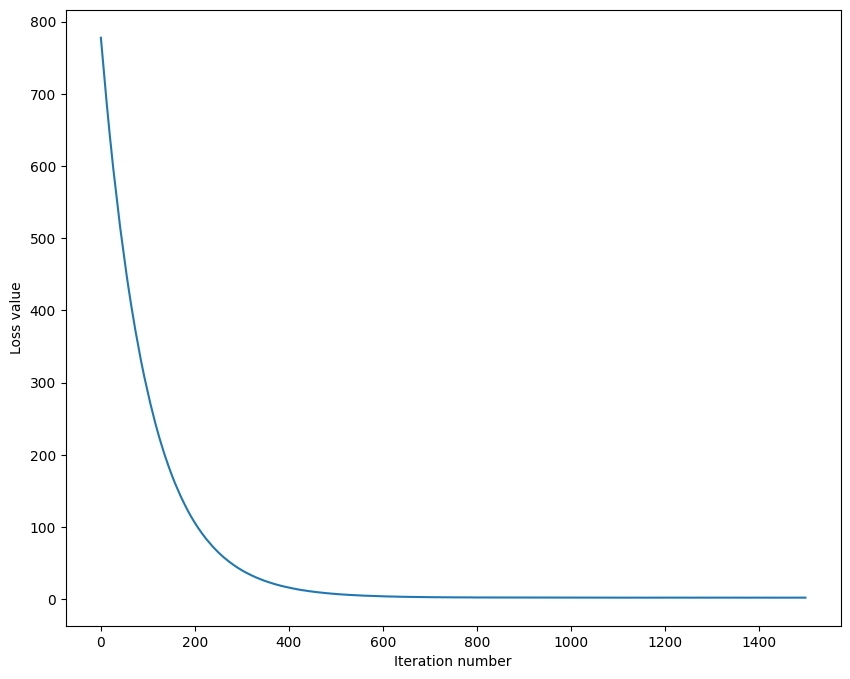

In [28]:
# A useful debugging strategy is to plot the loss as a function of
# iteration number:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

**Task 3.6**

Write the `LinearClassifier.predict` function and evaluate the performance on both the training and validation set.


In [29]:
#############################################################################
#                                                                           #
# TODO: implement code in linear_classifier.py                              #
#                                                                           #
#############################################################################

y_train_pred = model.predict(X_train)
train_acc = torch.mean((y_train == y_train_pred).float()).item()
print('training accuracy: %f' % train_acc)
y_val_pred = model.predict(X_val)
val_acc = torch.mean((y_val == y_val_pred).float()).item()
print('validation accuracy: %f' % val_acc)
#hint, if everything is correct, the results should be in range 0.3 to 0.35
assert train_acc > 0.15, "ERROR: Training accuracy too low - check predict() in linear_classifier.py"
assert val_acc > 0.15, "ERROR: Validation accuracy too low - check predict() in linear_classifier.py"
print("Task 3.6 passed: training accuracy: %.4f, validation accuracy: %.4f" % (train_acc, val_acc))

training accuracy: 0.326918
validation accuracy: 0.336000
Task 3.6 passed: training accuracy: 0.3269, validation accuracy: 0.3360


**Task 3.7**


In [95]:
# Use the validation set to tune hyperparameters (regularization strength and
# learning rate). You should experiment with different ranges (orders of magnitude)
# for the learning rates and regularization strengths.
#
# YOUR TASK IS to get a classification accuracy of over 0.35 on the validation set.

from linear_classifier import Softmax

results = {}
best_val = -1
best_softmax = None

X_train = X_train.to(torch.float64)
X_val = X_val.to(torch.float64)
y_train = y_train.to(torch.long)
y_val = y_val.to(torch.long)

################################################################################
# TODO:                                                                        #
# Write code that chooses the best hyperparameters by tuning on the validation #
# set. For each combination of hyperparameters, train a linear model on the    #
# training set, compute its accuracy on the training and validation sets, and  #
# store these numbers in the results dictionary. In addition, store the best   #
# validation accuracy in best_val and the Softmax object that achieves this    #
# accuracy in best_softmax.                                                    #
# TODO: the best model must achieve at least 0.35 accuracy                     #
# TODO: if not all parameters you tried are visible in the final submitted     #
# version, you might add a comment about what else you tried earlier.          #
#                                                                              #
# Hint: You should use a small value for num_iters as you develop your hyper-  #
# parameter search code so that the models don't take much time to train; once #
# you are confident that your code works, you should rerun the code with a     #
# larger value for num_iters.                                                  #
# The same approach might be useful to first determine the coarse range of     #
# useful values for both parameters (should it be near 0.1 or 0.0001?) and then#
# perform a finer-grained search.                                              #
################################################################################

#learning_rates = [1.2e-4, 1.5e-4, 1.8e-4, 2e-4]
#regularization_strengths = [3e-4, 4e-4, 5e-4]

#learning_rates = [1.4e-4, 1.5e-4, 1.6e-4, 1.7e-4, 1.8e-4]
#regularization_strengths = [4e-4, 4.5e-4, 5e-4, 5.5e-4, 6e-4, 6.5e-4, 7e-4, 1e-5, 2e-5]

learning_rates = [9e-5, 1e-4, 1.1e-4]
regularization_strengths = [1e-4, 2e-4, 3e-4]

for lr in learning_rates:
    for reg in regularization_strengths:
        print(f'Training with learning rate {lr} and regularization {reg}')

        softmax = Softmax()
        loss_hist = softmax.train(X_train, y_train, learning_rate=lr, reg=reg, num_iters=5000, verbose=False)

        y_val_pred = softmax.predict(X_val)
        val_acc = torch.mean((y_val == y_val_pred).float()).item()

        if val_acc > best_val:
            best_val = val_acc
            best_softmax = softmax

        results[(lr, reg)] = {
            'train_accuracy': torch.mean((y_train == softmax.predict(X_train)).float()).item(),
            'val_accuracy': val_acc
        }





################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
print("Hyperparameter tuning results:")
for (lr, reg), accuracies in results.items():
    print(f'lr {lr:e} reg {reg:e} train accuracy: {accuracies["train_accuracy"]:.3f} val accuracy: {accuracies["val_accuracy"]:.3f}')

print(f'Best validation accuracy achieved: {best_val:.3f}')

assert best_val >= 0.35, \
    "ERROR: Best validation accuracy %.3f is below required 0.35 - try different hyperparameters" % best_val
print("Task 3.7 passed: best validation accuracy %.3f >= 0.35" % best_val)

Training with learning rate 9e-05 and regularization 0.0001
Training with learning rate 9e-05 and regularization 0.0002
Training with learning rate 9e-05 and regularization 0.0003
Training with learning rate 0.0001 and regularization 0.0001
Training with learning rate 0.0001 and regularization 0.0002
Training with learning rate 0.0001 and regularization 0.0003
Training with learning rate 0.00011 and regularization 0.0001
Training with learning rate 0.00011 and regularization 0.0002
Training with learning rate 0.00011 and regularization 0.0003
Hyperparameter tuning results:
lr 9.000000e-05 reg 1.000000e-04 train accuracy: 0.327 val accuracy: 0.316
lr 9.000000e-05 reg 2.000000e-04 train accuracy: 0.270 val accuracy: 0.259
lr 9.000000e-05 reg 3.000000e-04 train accuracy: 0.296 val accuracy: 0.287
lr 1.000000e-04 reg 1.000000e-04 train accuracy: 0.319 val accuracy: 0.294
lr 1.000000e-04 reg 2.000000e-04 train accuracy: 0.282 val accuracy: 0.282
lr 1.000000e-04 reg 3.000000e-04 train accura

AssertionError: ERROR: Best validation accuracy 0.316 is below required 0.35 - try different hyperparameters

### <font style="color:red">I tried so many hyperparameter combinations that I lost track of which ones I have tried and yet still not luck :(

    The best score I got was 0.34

<br><br><br><br>


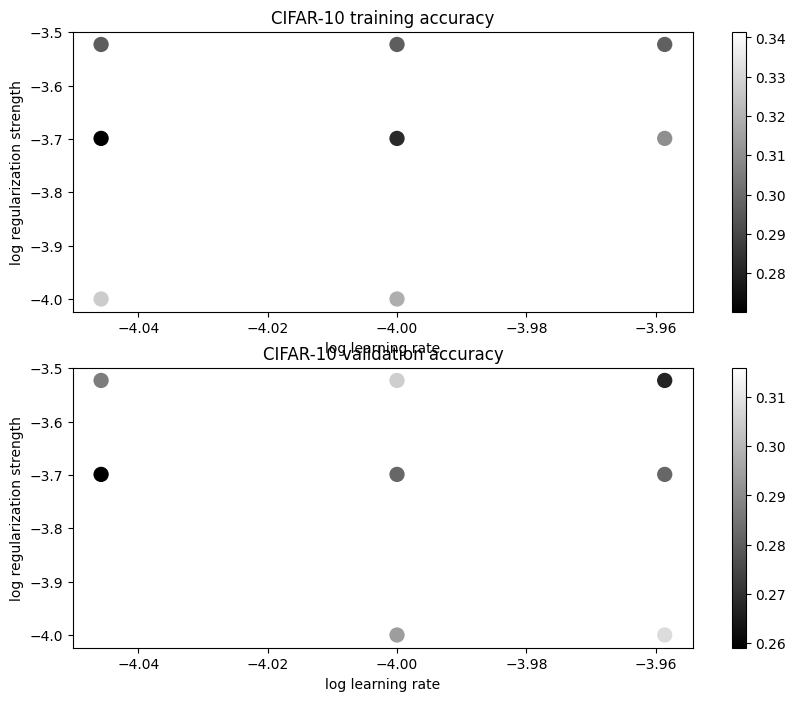

In [96]:
# Visualize the cross-validation results
import math

x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

# plot training accuracy
marker_size = 100
colors = [results[x]["train_accuracy"] for x in results]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 training accuracy')

# plot validation accuracy
colors = [results[x]["val_accuracy"] for x in results] # default size of markers is 20
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 validation accuracy')
plt.show()

In [97]:
# evaluate on test set
# Evaluate the best softmax on test set
X_test = X_test.to(best_softmax.W.device).to(torch.float64)
y_test = y_test.to(best_softmax.W.device).to(torch.long)

y_test_pred = best_softmax.predict(X_test)

test_accuracy = torch.mean((y_test == y_test_pred).float()).item()

print('softmax on raw pixels final test set accuracy: %f' % (test_accuracy, ))

softmax on raw pixels final test set accuracy: 0.301000


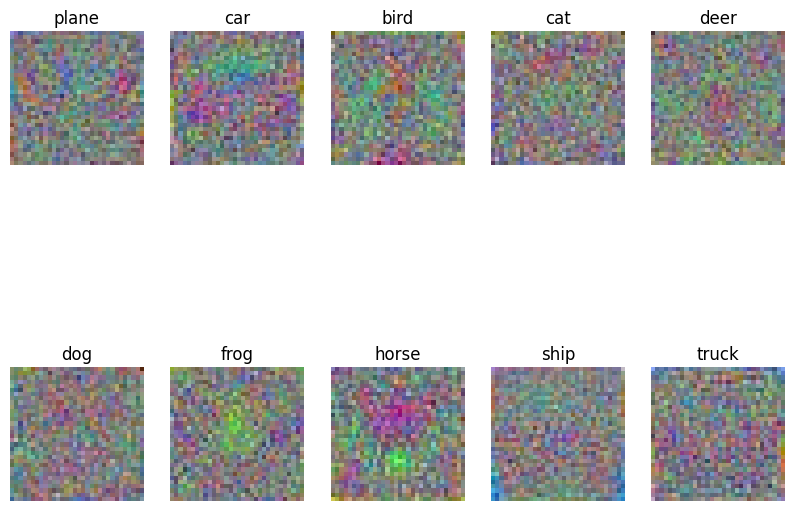

In [98]:
# Visualize the learned weights for each class
w = best_softmax.W[:-1, :] # strip out the bias
w = w.reshape(32, 32, 3, 10)

w_min, w_max = torch.min(w), torch.max(w)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(10):
    plt.subplot(2, 5, i + 1)

    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.type(torch.uint8).cpu().numpy())
    plt.axis('off')
    plt.title(classes[i])